# Online Retail Customer Behavior Analysis

 - Define and study problem (Non-technical)

### 🧾 Online Retail II Dataset — Columns Description

| **Column Name** | **Description (English)** |
|-----------------|----------------------------|
| **Invoice** | Unique invoice number representing each transaction. |
| **StockCode** | Unique product (item) code for each item in the store. |
| **Description** | Name or description of the product purchased. |
| **Quantity** | Number of units of the product purchased in the transaction. |
| **InvoiceDate** | Date and time when the transaction occurred. |
| **Price** | Unit price of the product (per item). |
| **Customer ID** | Unique identifier assigned to each customer. |
| **Country** | The country where the customer resides or made the purchase. |


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import re
from textblob import TextBlob
import warnings 
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_excel('online_retail_II.xlsx')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


- Data Wrangling
   - .1 Drop Unneeded Columns
   - .2 Handle Missing Values
   - .3 Drop Duplicated Values


- we can drop 'Customer ID' and 'StockCode' as they are not needed for our analysis
- 'Customer ID' is a unique identifier for each customer, and 'StockCode' is a unique identifier for each product

-  Drop Unneeded Columns

In [53]:
df.drop(columns=['Customer ID', 'StockCode'], inplace=True)

-  Handle Missing Values

In [54]:
df.isna().sum()

Invoice           0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Country           0
dtype: int64

In [55]:
df.isnull().sum() * 100 / len(df)

Invoice        0.000000
Description    0.557225
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Country        0.000000
dtype: float64

In [56]:
df.shape

(525461, 6)

- we can drop rows with missing values in 'Description' because they are not essential for our analysis and only .5% of the data is missing

In [57]:
df.dropna(inplace=True)

In [58]:
df.isnull().sum() * 100 / len(df)

Invoice        0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Country        0.0
dtype: float64

 -  Drop Duplicated Values

In [59]:
df.duplicated().sum()

np.int64(6996)

In [60]:
per_of_duplicated = df.duplicated().sum() * 100 / len(df)
per_of_duplicated


np.float64(1.3388628086647159)

- 1.3% of the data is duplicated and can be removed

In [61]:
df.drop_duplicates(inplace=True)

Data Analysis 
   - 1 Univariate Analysis
   - 2 Bivariate Analysis
   - 3 Multivariate Analysis

# Univariate Analysis

In [62]:
for col in df.columns:
    if df[col].nunique() < 100:
        print('-' * 50 + f' {col} ' + '-' * 50)
        print(df[col].value_counts())
        print('-' * 50 + f' {col} ' + '-' * 50)

-------------------------------------------------- Country --------------------------------------------------
Country
United Kingdom          475995
EIRE                      9657
Germany                   8120
France                    5754
Netherlands               2768
Spain                     1271
Switzerland               1187
Portugal                  1098
Belgium                   1053
Channel Islands            906
Sweden                     901
Italy                      727
Australia                  654
Cyprus                     546
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                308
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain       

In [63]:
for col in df.columns:
    if df[col].nunique() < 100:
        print('-' * 50 + f' {col} ' + '-' * 50)
        print(df[col].unique())
        print('-' * 50 + f' {col} ' + '-' * 50)

-------------------------------------------------- Country --------------------------------------------------
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland']
-------------------------------------------------- Country --------------------------------------------------


- we found that United Kingdom, EIRE, Germany, France, Netherlands, Spain, Switzerland, Portugal, Belgium are the top 10 countries 
-  it mean that the most of the customers are from these countries

In [64]:
# Top 5 countries
top_countries = df['Country'].value_counts().head(5)

In [65]:
top_countries.to_dict()

{'United Kingdom': 475995,
 'EIRE': 9657,
 'Germany': 8120,
 'France': 5754,
 'Netherlands': 2768}

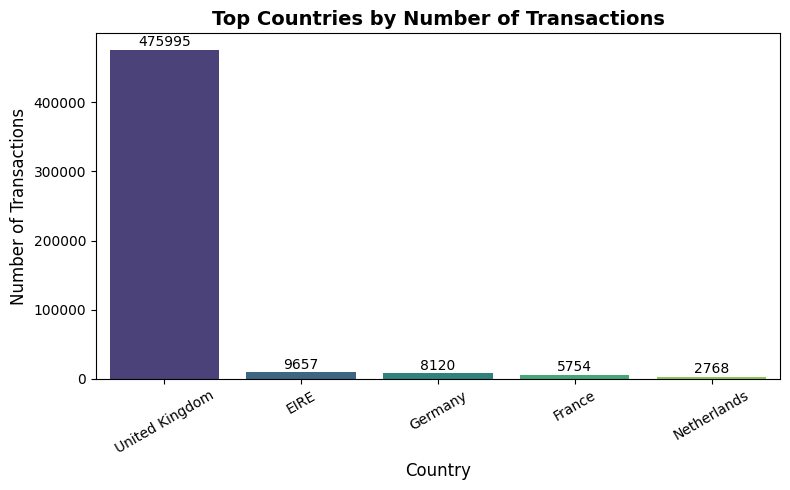

In [66]:
df_countries = pd.DataFrame(list(top_countries.items()), columns=['Country', 'Transactions'])
plt.figure(figsize=(8,5))
sns.barplot(data=df_countries, x='Country', y='Transactions', palette='viridis')
plt.title('Top Countries by Number of Transactions', fontsize=14, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=30)
for index, value in enumerate(df_countries['Transactions']):
    plt.text(index, value + 1000, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [67]:
country_counts = df['Country'].value_counts()

df_countries = pd.DataFrame({
    'Country': country_counts.index, # replace with your country column 
    'Transactions': country_counts.values # replace with your transaction count column
})

df_countries.head()


,Country,Transactions
0,United Kingdom,475995
1,EIRE,9657
2,Germany,8120
3,France,5754
4,Netherlands,2768


In [68]:
df_countries

,Country,Transactions
0,United Kingdom,475995
1,EIRE,9657
2,Germany,8120
3,France,5754
4,Netherlands,2768
5,Spain,1271
6,Switzerland,1187
7,Portugal,1098
8,Belgium,1053
9,Channel Islands,906


- we found the name of EIRE dosn't match with the name of Ireland in plotly 
- so we change the name of EIRE to Ireland

In [69]:
df['Country'] = df_countries['Country'].replace({
    'EIRE': 'Ireland',
})

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515537 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      515537 non-null  object        
 1   Description  515537 non-null  object        
 2   Quantity     515537 non-null  int64         
 3   InvoiceDate  515537 non-null  datetime64[ns]
 4   Price        515537 non-null  float64       
 5   Country      40 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ MB


In [71]:
fig = px.choropleth(
    df_countries , 
    locations='Country', # column name for locations
    locationmode='country names', # set to 'USA-states' for states
    color='Transactions', # column name for color
    color_continuous_scale='viridis', # set to 'USA-states' for states
    title='Top Countries by Number of Transactions', # set title
    labels={'Transactions': 'Number of Transactions'},# set labels
    hover_name='Country', # column to add to hover information
    hover_data={'Transactions': ':,'} # columns to add to hover information
)
fig.show()

In [72]:
df['Description'][:5]

0    15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                     PINK CHERRY LIGHTS
2                    WHITE CHERRY LIGHTS
3           RECORD FRAME 7" SINGLE SIZE 
4         STRAWBERRY CERAMIC TRINKET BOX
Name: Description, dtype: object

In [73]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)  
    return text.strip() 

In [74]:
# convert object to string
df['Description'] = df['Description'].astype(str)

In [75]:

df['clean_description'] = df['Description'].apply(clean_text)

In [76]:
def get_sentiment(text):
    if pd.isnull(text):  
        return None
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [77]:
df['sentiment_score'] = df['clean_description'].apply(get_sentiment)

In [78]:
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(sentiment_label)


In [79]:
df['sentiment_label'].value_counts()

sentiment_label
Neutral     376254
Negative     71912
Positive     67371
Name: count, dtype: int64

Text(0.5, 0, 'Sentiment Label')

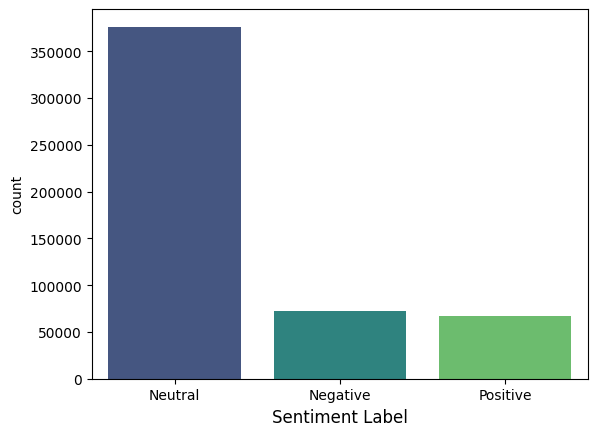

In [80]:
sns.countplot(data=df, x='sentiment_label' , palette='viridis')
plt.xlabel('Sentiment Label', fontsize=12)

- Price

In [81]:
df['Price'].describe()

count    515537.000000
mean          4.743701
std         147.525767
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64

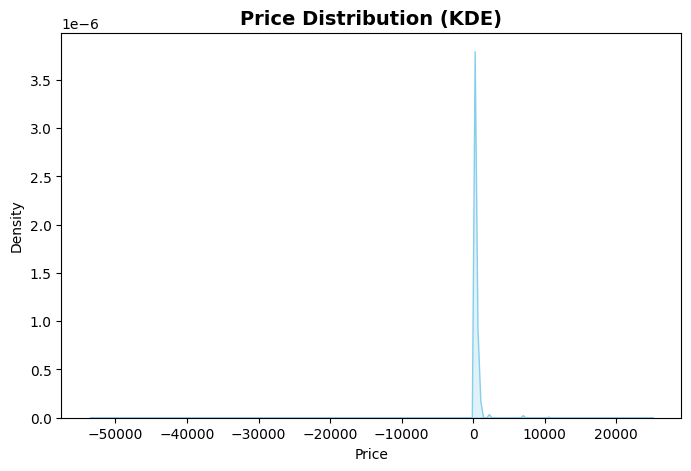

In [82]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Price', fill=True, color='skyblue')
plt.title('Price Distribution (KDE)', fontsize=14, weight='bold')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [83]:
df = df[df['Price'] > 0]
df = df[df['Price'] < df['Price'].quantile(0.99)] 

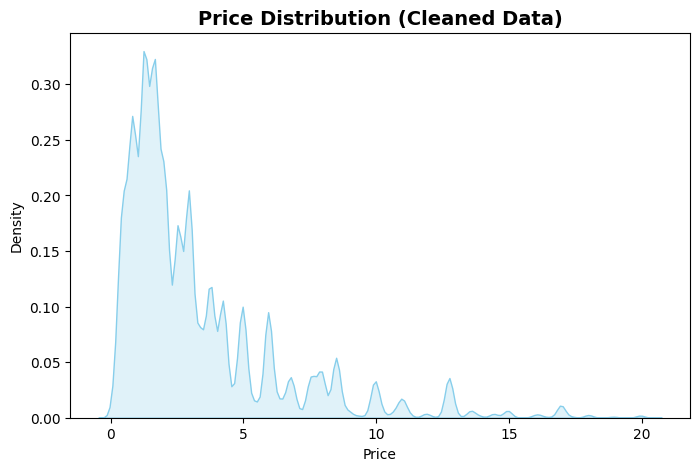

In [84]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Price', fill=True, color='skyblue', bw_adjust=0.7)
plt.title('Price Distribution (Cleaned Data)', fontsize=14, weight='bold')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

- Quantity

In [85]:
df['Quantity'].describe()

count    509612.000000
mean         10.972579
std          91.885021
min       -9360.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       19152.000000
Name: Quantity, dtype: float64

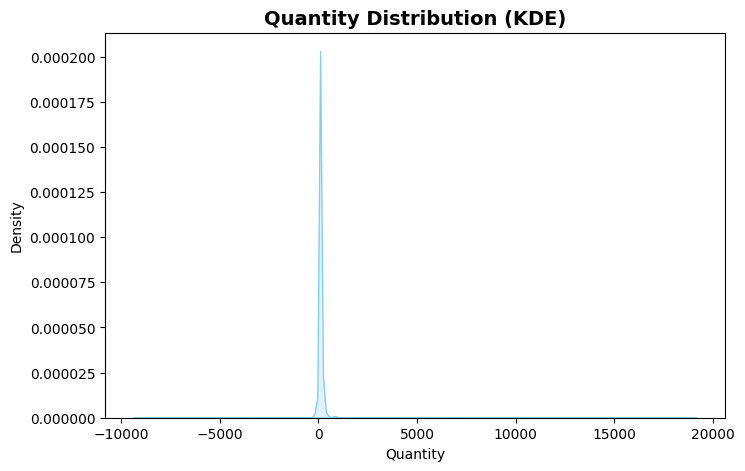

In [86]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Quantity', fill=True, color='skyblue')
plt.title('Quantity Distribution (KDE)', fontsize=14, weight='bold')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

## 📊 Quantity Column Analysis

### 1. Summary Statistics
| Metric | Value | Interpretation |
|:--|--:|--|
| **Count** | 509,612 | Number of valid records (non-null). |
| **Mean** | 10.97 | On average, around 11 items per order. |
| **Standard Deviation** | 91.88 | Very high dispersion — indicates extreme variation or outliers. |
| **Minimum** | -9,360 | Negative quantities — likely returns or data entry errors. |
| **25% (Q1)** | 1 | 25% of orders contain only one item. |
| **50% (Median)** | 3 | Half of the orders contain 3 items or fewer. |
| **75% (Q3)** | 10 | 75% of orders contain 10 items or fewer. |
| **Maximum** | 19,152 | Very large quantity — potential outlier. |

---

### 2. Problem Detected
The **standard deviation (91.88)** is extremely high compared to the **mean (10.97)**, meaning the data is highly spread out.  
This happens because there are **negative values (returns)** and **extremely large outliers**, which distort the distribution.

---

### 3. Data Cleaning Approach
To improve data quality and achieve a more realistic distribution:


- Remove negative quantities (likely returns or incorrect data)
-  Remove extremely large outliers (above the 99th percentile)

In [87]:
df = df[df['Quantity'] > 0]
q99 = df['Quantity'].quantile(0.99)
df = df[df['Quantity'] < q99]
print(df['Quantity'].describe())

count    494653.000000
mean          8.012140
std          12.613291
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         119.000000
Name: Quantity, dtype: float64


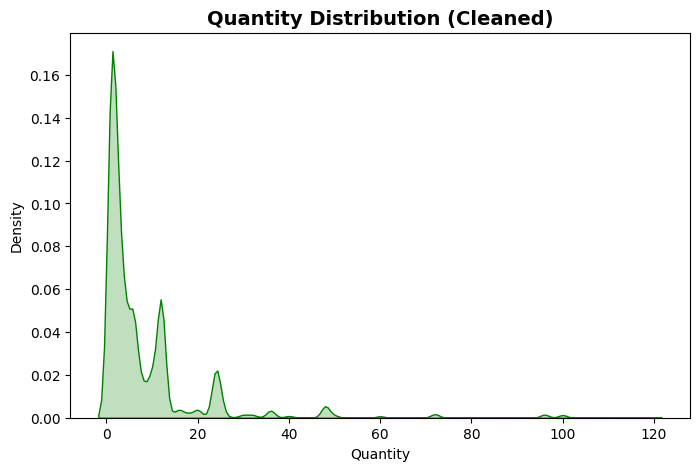

In [88]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Quantity'], fill=True, color='green')
plt.title('Quantity Distribution (Cleaned)', fontsize=14, weight='bold')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

##  Bivariate Analysis

In this section, we explore the relationships between pairs of variables to understand how they influence each other.



###  Quantity vs Price
We can check if higher prices lead to lower quantities or not.

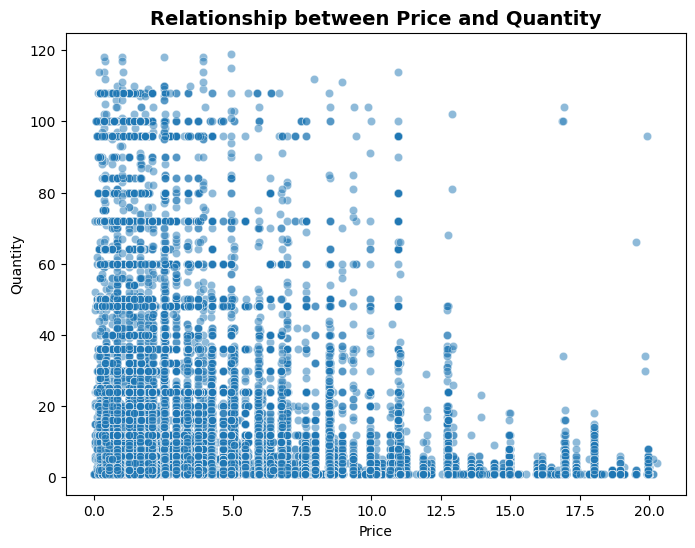

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Quantity', data=df, alpha=0.5)
plt.title('Relationship between Price and Quantity', fontsize=14, weight='bold')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

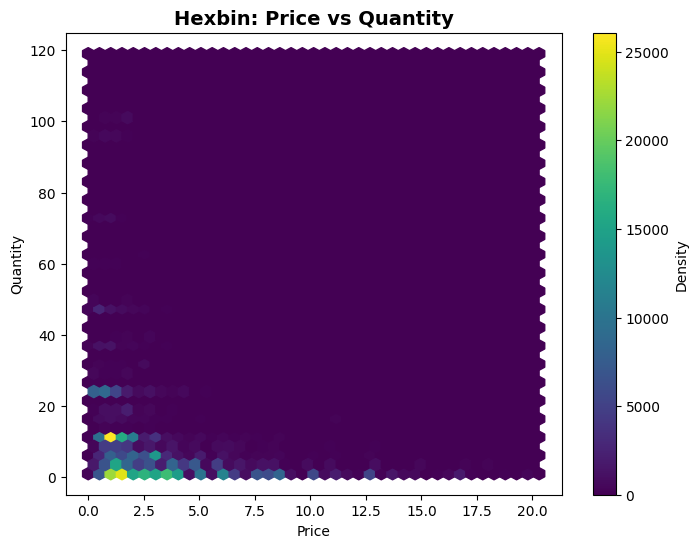

In [90]:
plt.figure(figsize=(8,6))
plt.hexbin(df['Price'], df['Quantity'], gridsize=40, cmap='viridis')
plt.title('Hexbin: Price vs Quantity', fontsize=14, weight='bold')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.colorbar(label='Density')
plt.show()


###  Country vs Total Sales
Which countries contribute most to total revenue?

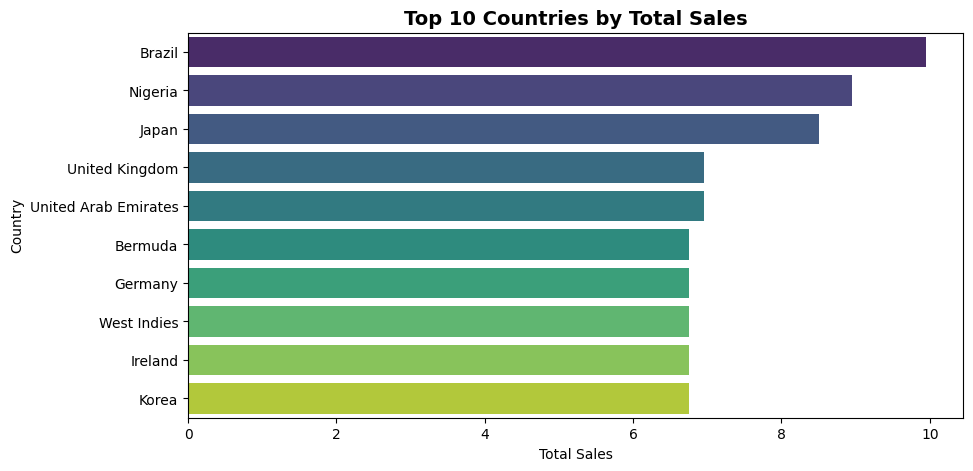

In [91]:
country_sales = df.groupby('Country')['Price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales', fontsize=14, weight='bold')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


# Multivariate Analysis

###  Country, Quantity, and Price
Let’s visualize how quantity and price interact across top countries.


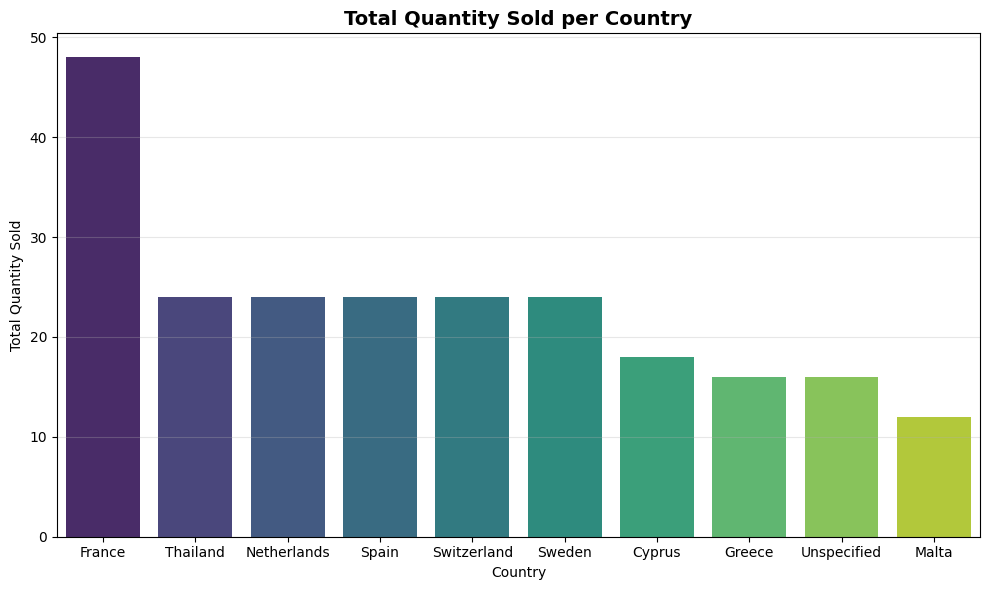

In [93]:
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')
plt.title('Total Quantity Sold per Country', fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


###  Correlation Heatmap (Numeric Features)

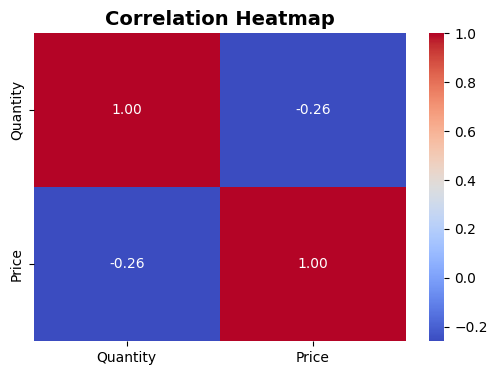

In [94]:
numeric_df = df[['Quantity', 'Price', ]].dropna()
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.show()


- we found a negative correlation between Quantity and Price in the heatmap
- this means that as Quantity increases, Price decreases